In [ ]:
## Ejecutar antes de comenzar para cargar la carpeta con el archivo de audio

!git clone https://github.com/jmmarinr/FisExperimental3.git

fatal: destination path 'FisExperimental3' already exists and is not an empty directory.


In [ ]:
# @title Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio


**IMPORTANTE**: Incluir en la bitácora


# Actividad 1







A continuación, se adjunta un archivo de audio en formato .wav correspondiente a la grabación de una nota musical proveniente de un piano. Tomando como base este archivo de audio, realice lo siguiente:


In [ ]:
Audio('/content/FisExperimental3/Tarea1/archivo_audio_tarea1.wav')

## Punto 1

Grafique la señal en función del tiempo. Imprima la frecuencia de muestreo y el número de muestras.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio
from google.colab import files
uploaded = files.upload()

Saving archivo_audio_tarea1.wav to archivo_audio_tarea1.wav


In [ ]:
samplerate, data = wavfile.read('archivo_audio_tarea1.wav')

print(f'Sample frequency= {samplerate} Hz')
print(f'Number of samples = {len(data)}')

Sample frequency= 11025 Hz
Number of samples = 11250


Text(0.5, 1.0, 'Señal en función del tiempo')

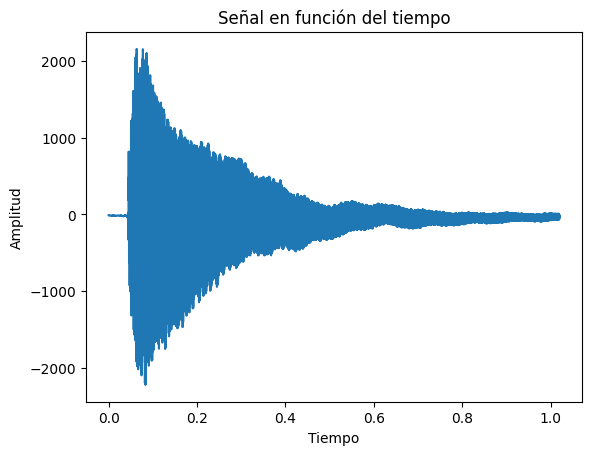

In [ ]:
dt = 1 / samplerate
t0 = 0
tf = len(data)*dt

tiempo = np.arange(t0,tf,dt)
señal = data
plt.plot(tiempo,señal)

plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal en función del tiempo")

## Punto 2

Calcule la transformada de Fourier y realice un código para identificar y hacer una lista con la frecuencia fundamental y las secundarias$^1$. Grafique la magnitud de la transformada en función de la frecuencia y superponga los puntos correspondientes a los máximos.



$^1$ Puede emplear la librería <code> find_peaks </code> de <code >scipy.signal </code>.

Frecuencias: [ 771.26  776.16  784.   1571.92 2367.68]


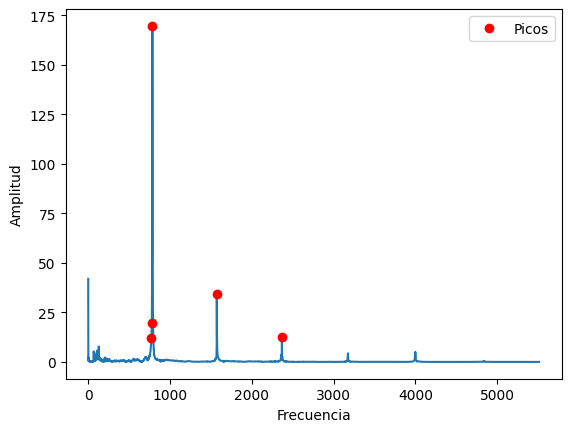

In [ ]:
from scipy.signal import find_peaks

señal_FFT = np.fft.fft(señal/len(señal))
señal_FFT = señal_FFT[range(int(len(señal)/2))]

indices = np.arange(len(señal_FFT))
tiempo_duracion = len(señal) / samplerate
frecuencias = indices / tiempo_duracion

picos, _ = find_peaks(np.abs(señal_FFT), height=10)
frecuencias_encontradas = frecuencias[picos]   #solo toma las frecuancias donde hay picos

plt.plot(frecuencias,np.abs(señal_FFT))
plt.plot(frecuencias_encontradas,abs(señal_FFT)[picos],"o",color="red",label="Picos")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.legend()
print(f"Frecuencias: {frecuencias_encontradas}")

## Punto 3

Con base en la ecuación $f_N$ =440 Hz$\times$2$^{N/12}$, con $f_N$ la frecuencia de la nota $N$ y siendo $N=0$ la nota La4, identifique el nombre de la nota musical presente en la grabación.


In [ ]:
# Aqui su código

## Punto 4

En la señal de la grabación puede identificar que esta desaparece gradualmente. Este decaimiento en la amplitud se puede modelar con la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. Realice un código para encontrar la amplitud de las oscilaciones1 $r’(t)={…}$ y ajuste $^2$ los valores de $r’(t)$ al modelo $r(t)$ con el fin de hallar los parámetros $r_0$ y τ. Superponga las gráficas de la grabación con la de $r’(t)$ y $r(t)$ y compruebe si el modelado del decaimiento es correcto.


$^2$ Para realizar el ajuste, puede linealizar el modelo aplicando logaritmo natural a ambos lados de la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. De este modo se puede hacer un ajuste lineal en lugar de uno exponencial.


In [ ]:
# Aqui su código

## Punto 5

Con base en los resultados del punto 2), construya la siguiente tabla:

| Frecuencia ($f_i$) | Amplitud ($A_i$) |
|:--------:|:--------:|
|Valor 1|Valor 2|

In [ ]:
# Aqui su código

## Punto 6
Usando la tabla anterior, sintetice la señal del piano, usando la ecuación para $S(t)$ y cree un archivo de audio con ella o reprodúzcala en su tarjeta de sonido.


$$S(t)=r(t)\sum_i A_i \sin (2π ×f_i×t)$$

Compare ambas señales sintética y real y concluya sobre sus diferencias, tanto a nivel físico (comparando las gráficas en función del tiempo) como subjetivo (calidad o riqueza del sonido). ¿Las frecuencias que se excluyeron de $S(t)$ qué tanto afectan la calidad del sonido?



In [ ]:
# Aqui su código

## Punto 7

Escriba sus conclusiones y aportes personales sobre este ejercicio. Además discuta sobre la importancia de la transformada de Fourier en el análisis de señales de auido

In [ ]:
# Aqui su código